In [1]:
import pandas as pd
import numpy as  np
from  sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

## load the data 

In [3]:
data=pd.read_csv("HousingData.csv")

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Describe each district of category

In [6]:
data["CRIM"].value_counts


<bound method IndexOpsMixin.value_counts of 0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64>

In [7]:
#info()used to get quick informatioon of data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Show summary of attribute


In [9]:
data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### VISULAIZATION

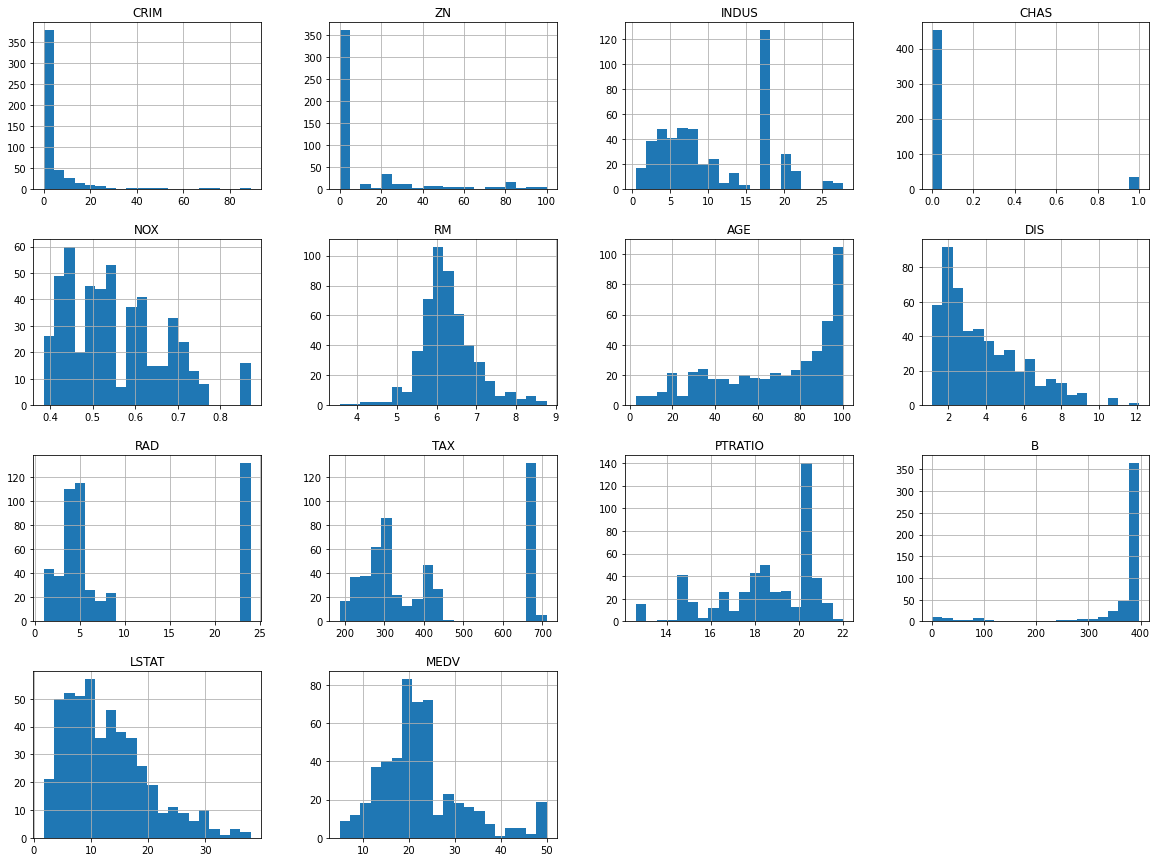

In [12]:
#plot graphs
data.hist(bins=20,figsize=(20,15))
plt.show()

### Splitting into training and testing

In [14]:
#create test dataset
train_set,test_set = model_selection.train_test_split(data,test_size=0.2 ,random_state=42)


### pd.cut() this function is used to create an income category attribute with 5 categories


<AxesSubplot:>

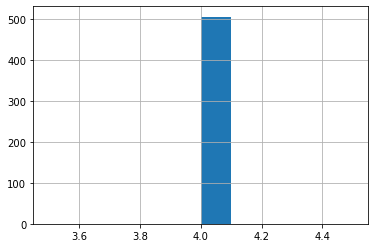

In [15]:
data['tax_data']=pd.cut(data['TAX'],bins=[0,1.5,3.,4., np.inf],labels=[1,2,3,4])

data['tax_data'].hist()

In [16]:
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2 ,random_state=42)
for train_index,test_index in split.split(data,data['tax_data']):
    strat_train_set=data.iloc[train_index]
    strat_test_set=data.iloc[test_index]

strat_test_set["tax_data"].value_counts() / len(strat_test_set)

4    1.0
1    0.0
2    0.0
3    0.0
Name: tax_data, dtype: float64

### Now we should remove the data back into its original position

In [17]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("tax_data",axis =1,inplace =True)


D:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
#create a copy
data=strat_train_set.copy()

#correlations
corr_matrix=data.corr()

corr_matrix['AGE'].sort_values(ascending=False)



AGE        1.000000
NOX        0.731647
INDUS      0.653892
LSTAT      0.637342
TAX        0.523373
RAD        0.466692
CRIM       0.356253
PTRATIO    0.276951
CHAS       0.091839
RM        -0.277462
B         -0.277535
MEDV      -0.427573
ZN        -0.581057
DIS       -0.734195
Name: AGE, dtype: float64

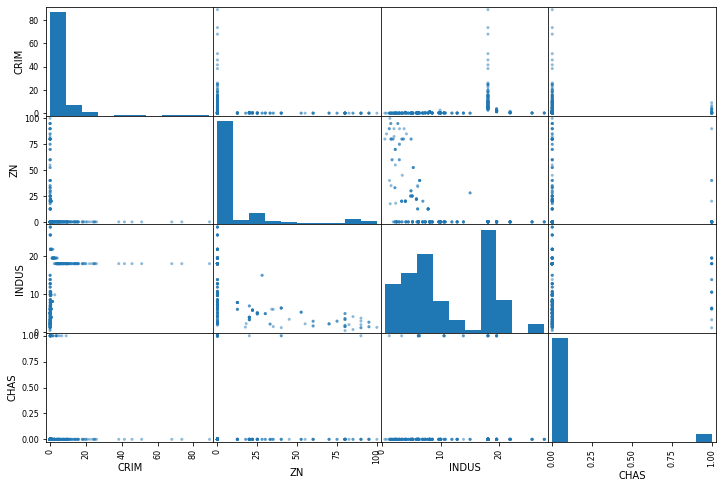

In [20]:
attributes = ["CRIM", "ZN", "INDUS",
 "CHAS"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

In [21]:
# Get rid of missing values
imputer = SimpleImputer(strategy="median")
data_num=data.drop('CHAS',axis=1)
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [22]:
imputer.statistics_

array([2.55570e-01, 0.00000e+00, 9.69000e+00, 5.38000e-01, 6.21000e+00,
       7.69000e+01, 3.16750e+00, 5.00000e+00, 3.30000e+02, 1.91000e+01,
       3.91305e+02, 1.16450e+01, 2.11500e+01])

In [23]:
data_num.median().values

array([2.55570e-01, 0.00000e+00, 9.69000e+00, 5.38000e-01, 6.21000e+00,
       7.69000e+01, 3.16750e+00, 5.00000e+00, 3.30000e+02, 1.91000e+01,
       3.91305e+02, 1.16450e+01, 2.11500e+01])

In [26]:
x=imputer.transform(data_num)

In [27]:
#if you put back into pandas Dataframe
data_=pd.DataFrame(x, columns=data_num.columns)

data_cat = data[["CHAS"]]
data_cat.head(10)

,CHAS
242,0.0
354,0.0
44,0.0
177,0.0
73,0.0
380,0.0
342,0.0
159,0.0
199,0.0
338,0.0


In [28]:
data.isnull().sum()

CRIM       16
ZN         14
INDUS      16
CHAS       17
NOX         0
RM          0
AGE        19
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      18
MEDV        0
dtype: int64

In [29]:
data.dropna(inplace=True)
data.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [30]:
data['CRIM'].mean()

4.025859354838709

In [31]:
data['CRIM'].replace(np.NAN,data['CRIM'].mean()).head(10)

242     0.10290
354     0.04301
44      0.12269
380    88.97620
342     0.02498
159     1.42502
199     0.03150
338     0.03306
57      0.01432
184     0.08308
Name: CRIM, dtype: float64

In [33]:
data['ZN'].mean()

11.819354838709678

In [34]:
data['ZN'].replace(np.NAN,data['ZN'].mean()).head(10)


242     30.0
354     80.0
44       0.0
380      0.0
342      0.0
159      0.0
199     95.0
338      0.0
57     100.0
184      0.0
Name: ZN, dtype: float64

In [36]:
data['INDUS'].replace(np.NAN,data['INDUS'].mean()).head(10)


242     4.93
354     1.91
44      6.91
380    18.10
342     1.89
159    19.58
199     1.47
338     5.19
57      1.32
184     2.46
Name: INDUS, dtype: float64

In [37]:
data['CHAS'].replace(np.NAN,data['CHAS'].mean()).head(10)


242    0.0
354    0.0
44     0.0
380    0.0
342    0.0
159    0.0
199    0.0
338    0.0
57     0.0
184    0.0
Name: CHAS, dtype: float64

In [38]:
data['RM'].replace(np.NAN,data['RM'].mean()).head(10)

242    6.358
354    5.663
44     6.069
380    6.968
342    6.540
159    6.510
199    6.975
338    6.059
57     6.816
184    5.604
Name: RM, dtype: float64

In [39]:
data['NOX'].replace(np.NAN,data['NOX'].mean()).head(10)



242    0.428
354    0.413
44     0.448
380    0.671
342    0.518
159    0.871
199    0.403
338    0.515
57     0.411
184    0.488
Name: NOX, dtype: float64

In [40]:
data['AGE'].replace(np.NAN,data['AGE'].mean()).head(10)


242     52.9
354     21.9
44      40.0
380     91.9
342     59.7
159    100.0
199     15.3
338     37.3
57      40.5
184     89.8
Name: AGE, dtype: float64

In [41]:
data['DIS'].replace(np.NAN,data['DIS'].mean()).head(10)


242     7.0355
354    10.5857
44      5.7209
380     1.4165
342     6.2669
159     1.7659
199     7.6534
338     4.8122
57      8.3248
184     2.9879
Name: DIS, dtype: float64

In [42]:

data['RAD'].replace(np.NAN,data['RAD'].mean()).head(10)



242     6
354     4
44      3
380    24
342     1
159     5
199     3
338     5
57      5
184     3
Name: RAD, dtype: int64

In [43]:
data['TAX'].replace(np.NAN,data['TAX'].mean()).head(10)


242    300
354    334
44     233
380    666
342    422
159    403
199    402
338    224
57     256
184    193
Name: TAX, dtype: int64

In [44]:
data['PTRATIO'].replace(np.NAN,data['PTRATIO'].mean()).head(10)

242    16.6
354    22.0
44     17.9
380    20.2
342    15.9
159    14.7
199    17.0
338    20.2
57     15.1
184    17.8
Name: PTRATIO, dtype: float64

In [45]:
data['B'].replace(np.NAN,data['B'].mean()).head(10)

242    372.75
354    382.80
44     389.39
380    396.90
342    389.96
159    364.31
199    396.90
338    396.14
57     392.90
184    391.00
Name: B, dtype: float64

In [46]:
data['LSTAT'].replace(np.NAN,data['LSTAT'].mean()).head(10)


242    11.22
354     8.05
44      9.55
380    17.21
342     8.65
159     7.39
199     4.56
338     8.51
57      3.95
184    13.98
Name: LSTAT, dtype: float64

In [47]:
data['MEDV'].replace(np.NAN,data['MEDV'].mean()).head(10)

242    22.2
354    18.2
44     21.2
380    10.4
342    16.5
159    23.3
199    34.9
338    20.6
57     31.6
184    26.4
Name: MEDV, dtype: float64

In [48]:
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),

 ('std_scaler', StandardScaler()),
 ])
data_num = num_pipeline.fit_transform(data_num)



data_num

array([[-0.38919517,  0.79323679, -0.91668211, ...,  0.17898798,
        -0.22478012, -0.03263282],
       [-0.39578348,  2.88138211, -1.36342865, ...,  0.28829292,
        -0.66772055, -0.4596339 ],
       [-0.38701813, -0.4596504 , -0.62378206, ...,  0.35996651,
        -0.45812729, -0.13938309],
       ...,
       [ 1.08702052, -0.4596504 ,  1.03154703, ..., -2.44574444,
         0.07004773,  0.06344243],
       [-0.39636982,  2.88138211, -1.42112109, ...,  0.39052838,
        -0.86753279,  1.29107053],
       [-0.3356053 , -0.4596504 ,  1.59219915, ...,  0.32048622,
        -0.23875301,  0.0527674 ]])

In [49]:
# my target is MEDV for training and testing data
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices ,test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [53]:
def fit_model(x,y):
    cv_sets=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
    # Create a decision tree regressor object
    regressor=DecisionTreeRegressor()
    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params={'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    # Create the grid search cv object --> GridSearchCV()
    grid=GridSearchCV(estimator=regressor,param_grid=params,cv=cv_sets)
    # Fit the grid search object to the data to compute the optimal model
    grid.fit(x,y)
    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [54]:
reg = fit_model(X_train, y_train)
# produce the value of 'max_depth'
print("parameter 'max_depth'is {} for optimal model.".format(reg.get_params()['max_depth']))

parameter 'max_depth'is 2 for optimal model.
